In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data (1).csv")

In [3]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns='Unnamed: 32', inplace=True)

In [7]:
df.head()
df['diagnosis'].replace({'B':1, 'M':0}, inplace=True)

<AxesSubplot:>

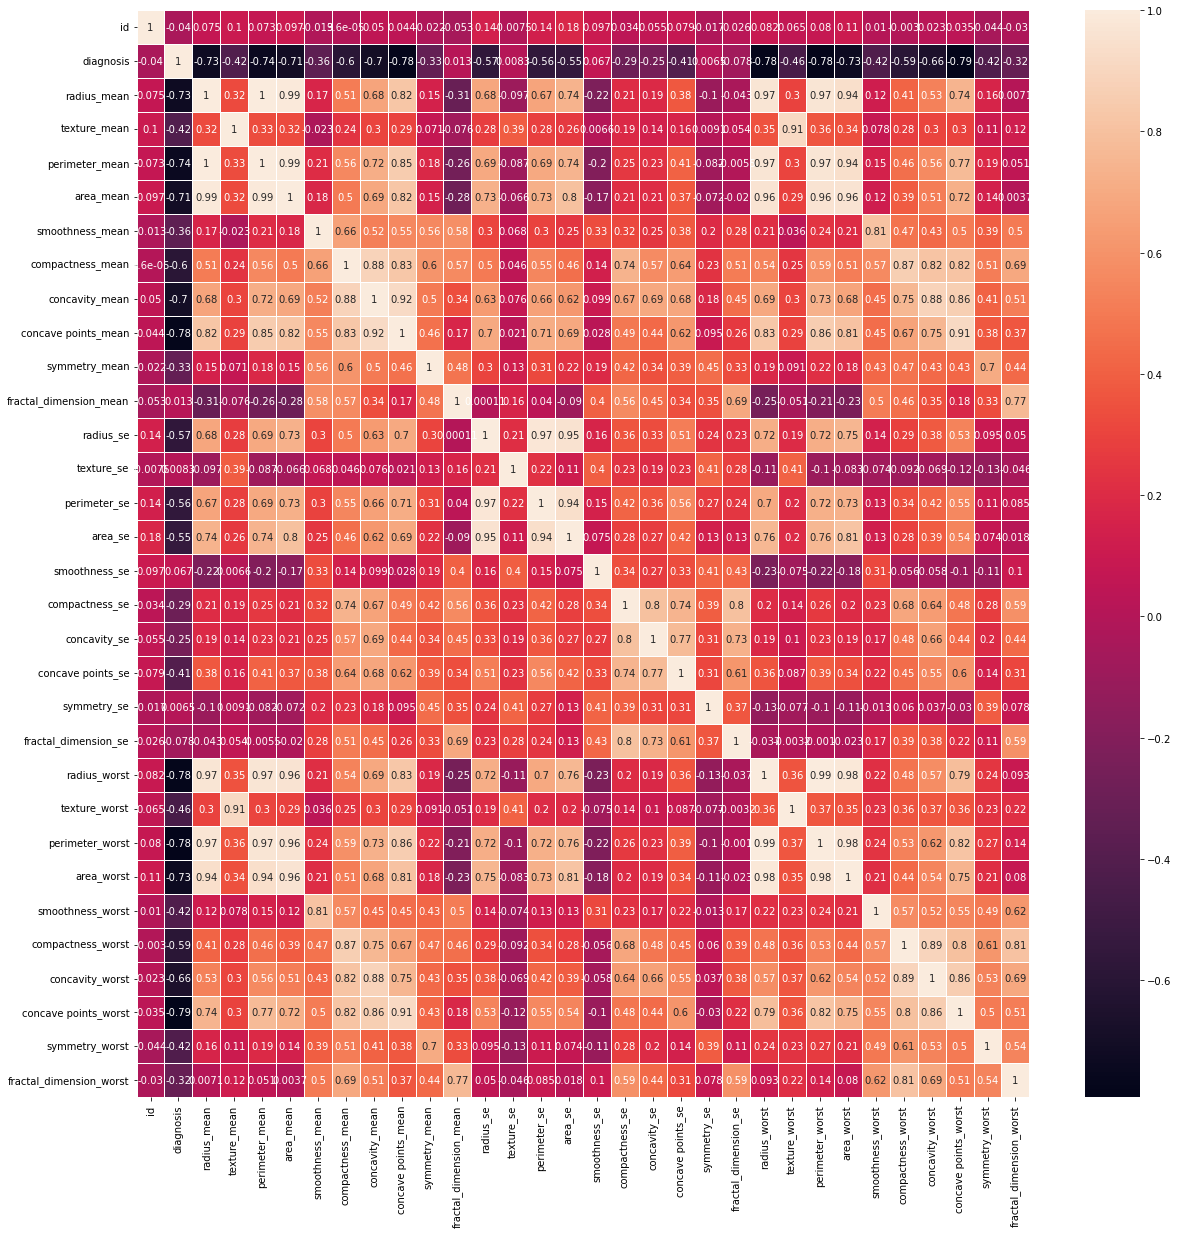

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

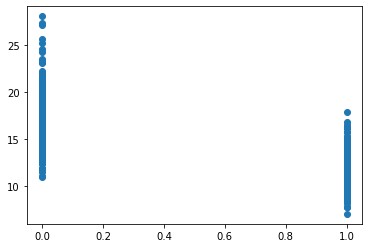

In [9]:
plt.scatter(x='diagnosis', y='radius_mean', data=df)

In [10]:
for col in df.columns:
    if abs(df['diagnosis'].corr(df[col])) < 0.4:
        df.drop(columns=col, inplace=True)
#removing low correlation columns

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,0,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,0,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,0,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,0,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [12]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])


pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
accuracy = pipeline.score(X_test, y_test)
print(accuracy)

0.9122807017543859


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_matrix_DT = confusion_matrix(y_test, y_pred)

DT_SCORES = {'Accuracy': accuracy, 'Precision':precision , 'Recall': recall}

In [16]:
DT_SCORES

{'Accuracy': 0.9122807017543859,
 'Precision': 0.9420289855072463,
 'Recall': 0.9154929577464789}

In [17]:
confusion_matrix_DT

array([[39,  4],
       [ 6, 65]], dtype=int64)

In [18]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(accuracy)

0.9649122807017544


In [19]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_matrix_RF = confusion_matrix(y_test, y_pred)

RF_SCORES = {'Accuracy': accuracy, 'Precision':precision , 'Recall': recall}

In [21]:
RF_SCORES

{'Accuracy': 0.9649122807017544,
 'Precision': 0.958904109589041,
 'Recall': 0.9859154929577465}

In [22]:
confusion_matrix_RF

array([[40,  3],
       [ 1, 70]], dtype=int64)

In [ ]:
#RandomForrest is much stronger